In [1]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
from glob import glob
from tqdm import tqdm
try:
    import csiborgtools
except ModuleNotFoundError:
    print("not found")
    import sys
    sys.path.append("../")
    import csiborgtools


%matplotlib notebook
%load_ext autoreload
%autoreload 2

not found


In [171]:
knnreader = csiborgtools.read.kNNCDFReader()

auto_files = glob("/mnt/extraspace/rstiskalek/csiborg/knn/auto/*")
ks = [0, 3, 7]
rs, cdf, mass_thresholds = knnreader.read_auto(auto_files, ks, rmin=0.1)

100%|██████████| 101/101 [00:01<00:00, 83.71it/s]


<IPython.core.display.Javascript object>


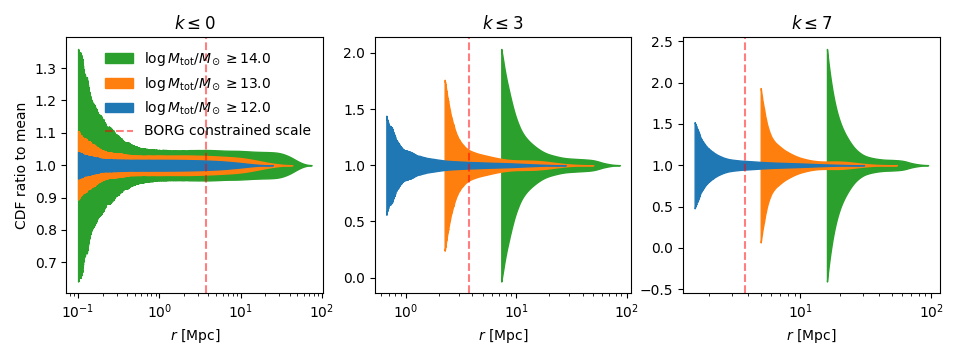

In [172]:
mu = np.mean(cdf, axis=0)
std = np.std(cdf, axis=0)


cols = plt.rcParams["axes.prop_cycle"].by_key()["color"]
fig, axs = plt.subplots(ncols=3, figsize=(6.4 * 1.5, 4.8 * 0.75))

for ki, k in enumerate(ks):
    for n in list(range(3))[::-1]:
        label = r"$\log M_{{\rm tot}} / M_\odot \geq {}$".format(np.log10(mass_thresholds[n]))
        axs[ki].fill_between(rs, 1 - std[n, ki, :] / mu[n, ki, :], 1 + std[n, ki, :] / mu[n, ki, :],
                             color=cols[n], label=label)

    axs[ki].set_title(r"$k \leq {}$".format(k))
    axs[ki].axvline(2.65 / 0.705, c="red", ls="--", label="BORG constrained scale", alpha=0.5)
    axs[ki].set_xscale("log")
    axs[ki].set_xlabel(r"$r~\left[\mathrm{Mpc}\right]$")    
    
axs[0].set_ylabel(r"CDF ratio to mean")
axs[0].legend(frameon=False)

plt.tight_layout(w_pad=0)
fig.savefig("../plots/knn_auto.png", dpi=450)
fig.show()

In [173]:
knnreader = csiborgtools.read.kNNCDFReader()

cross_files = glob("/mnt/extraspace/rstiskalek/csiborg/knn/cross/knncdf_9004*")
len(cross_files)

ks = [0, 3, 7]
rs, corr, mass_thresholds = knnreader.read_cross(cross_files, ks, rmin=1)

100%|██████████| 35/35 [00:00<00:00, 85.32it/s]


<IPython.core.display.Javascript object>


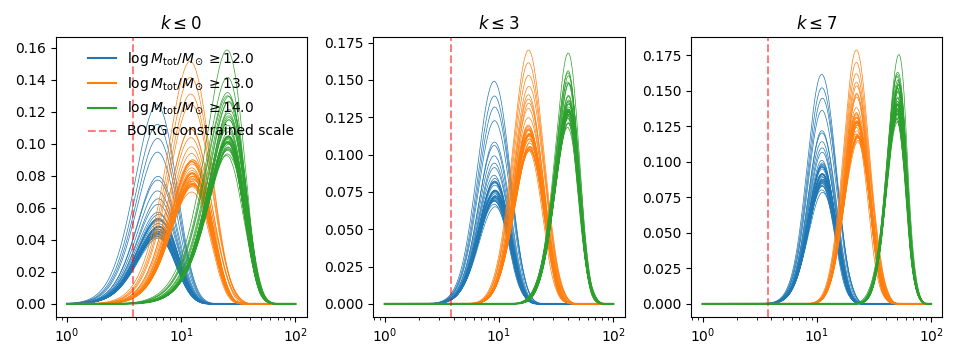

In [174]:
cols = plt.rcParams["axes.prop_cycle"].by_key()["color"]


fig, axs = plt.subplots(ncols=3, figsize=(6.4 * 1.5, 4.8 * 0.75))
for ki, k in enumerate(ks):
    for n in range(3):
        for i in range(35):
            axs[ki].plot(rs, corr[i, n, ki, :], c=cols[n], lw=0.5)

        axs[ki].plot(rs, np.median(corr[:, n, ki, :], axis=0), c=cols[n],
                     label=r"$\log M_{{\rm tot}} / M_\odot \geq {}$".format(np.log10(mass_thresholds[n])))

    
    axs[ki].axvline(2.65 / 0.705, c="red", ls="--", label="BORG constrained scale", alpha=0.5)
    axs[ki].set_xscale("log")
    axs[ki].set_title(r"$k \leq {}$".format(k))
axs[0].legend(frameon=False)
plt.tight_layout()
fig.savefig("../plots/knn_cross.png", dpi=450)
fig.show()